In [42]:
# import data from python library
import numpy as np
import pandas as pd 

# import data from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# import data from jcopml library
from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [43]:
# read dataset
df = pd.read_csv('house_price_id_t.csv')
df.head()

,id,price,bedrooms,sqft_lot,waterfront,view,condition,sqft_above,"sqft_basement,,",bathrooms,floors,sqft_living
0,1,315000,3,7912,0,0,3,1340,0.0,"1,5","1,5",1340
1,2,1394000,5,9050,0,4,5,3370,NaN,"2,5",2,3650
2,3,520000,3,11947,0,0,4,1930,NaN,2,1,1930
3,4,485000,3,8030,0,0,4,1000,NaN,"2,3",1,2000
4,5,478000,4,10500,0,0,4,1140,NaN,"2,5",1,1940


In [44]:
# cek missing data 
plot_missing_value

<function jcopml.plot._missing_value.plot_missing_value(df, return_df=False, feature_alignment='horizontal', figsize=(15, 8))>

,missing_value,%
id,0,0.00
price,0,0.00
bedrooms,0,0.00
sqft_lot,0,0.00
waterfront,0,0.00
view,0,0.00
condition,0,0.00
sqft_above,0,0.00
"sqft_basement,,",4336,94.26
bathrooms,0,0.00


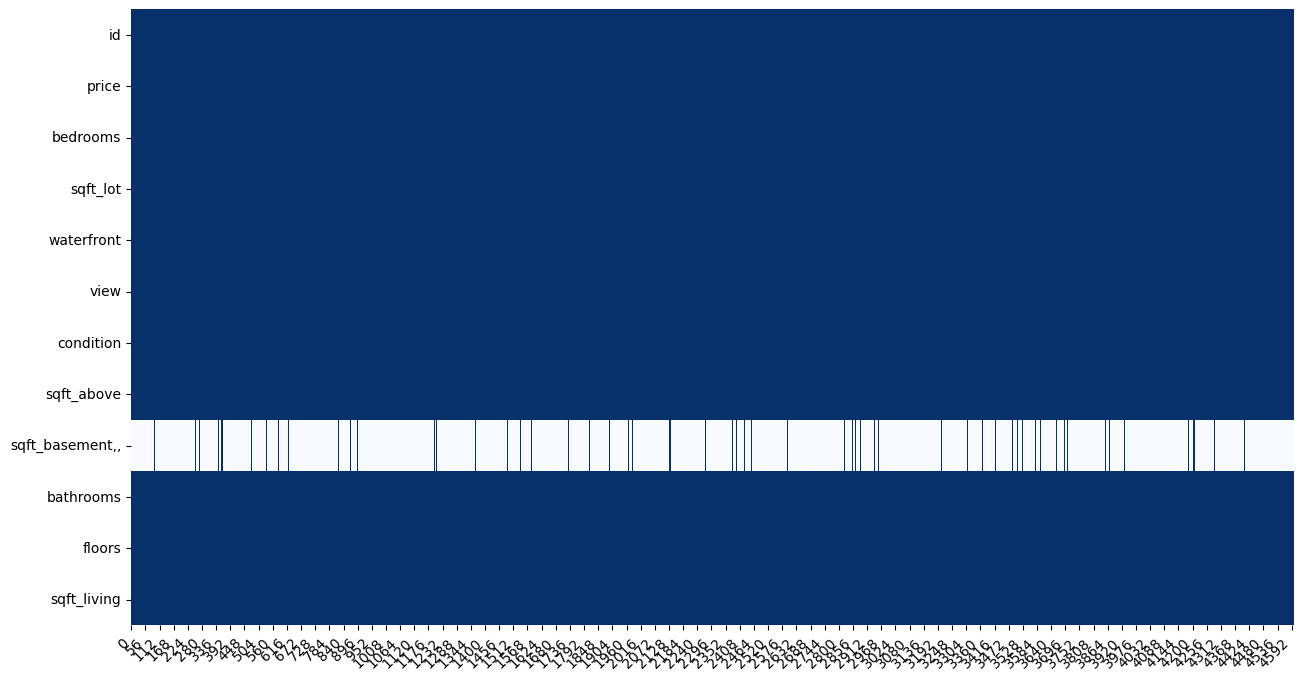

In [45]:
# cek missing value
plot_missing_value(df, return_df=True)

In [46]:
# normalize
df.value_counts(normalize=True)

id    price    bedrooms  sqft_lot  waterfront  view  condition  sqft_above  sqft_basement,,  bathrooms  floors  sqft_living
1     315000   3         7912      0           0     3          1340        0.0              1,5        1,5     1340           0.003788
3310  589000   4         3375      0           0     4          1420        760.0            2,5        1,5     2180           0.003788
3048  323000   4         9360      0           0     3          1150        0.0              1,5        1,5     1150           0.003788
3066  375000   3         10150     0           0     3          1660        0.0              1,8        1,5     1660           0.003788
3088  372000   4         8891      0           0     3          1180        270.0            1,8        1,5     1450           0.003788
                                                                                                                                 ...   
1618  615000   3         6000      0           0     4      

In [47]:
# data cleansing replace na variable with 1.0
df = pd.read_csv('house_price_id_t.csv')
df.fillna(1.0, inplace = True)

# encode data from string to float
df['bathrooms'] = df['bathrooms'].str.replace(',', '').astype(float)
df['floors'] = df['floors'].str.replace(',', '').astype(float)
print(df)

        id    price  bedrooms  sqft_lot  waterfront  view  condition  \
0        1   315000         3      7912           0     0          3   
1        2  1394000         5      9050           0     4          5   
2        3   520000         3     11947           0     0          4   
3        4   485000         3      8030           0     0          4   
4        5   478000         4     10500           0     0          4   
...    ...      ...       ...       ...         ...   ...        ...   
4595  4596   432000         3      6360           0     0          4   
4596  4597   376000         3      7573           0     0          3   
4597  4598   707000         3      7014           0     0          3   
4598  4599   482000         4      6630           0     0          3   
4599  4600   446000         3      8102           0     0          4   

      sqft_above  sqft_basement,,  bathrooms  floors  sqft_living  
0           1340              0.0       15.0    15.0         1340  

In [48]:
# normalize
df.value_counts(normalize=True)

id    price   bedrooms  sqft_lot  waterfront  view  condition  sqft_above  sqft_basement,,  bathrooms  floors  sqft_living
1     315000  3         7912      0           0     3          1340        0.0              15.0       15.0    1340           0.000217
3065  568000  3         8625      0           0     3          1360        1.0              38.0       1.0     1950           0.000217
3071  565000  3         15264     0           0     3          2430        1.0              25.0       2.0     2430           0.000217
3070  351000  3         5100      0           0     3          1150        1.0              1.0        2.0     1150           0.000217
3069  491000  3         1599      0           0     3          1430        1.0              2.0        2.0     1890           0.000217
                                                                                                                                ...   
1540  171000  2         423838    0           2     5          900 

In [49]:
# Spliting dataset 80% dan 20%
X = df.drop(columns="price")
y = df["price"] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(X_train.columns)

(3680, 11) (920, 11) (3680,) (920,)
Index(['id', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement,,', 'bathrooms', 'floors', 'sqft_living'],
      dtype='object')


In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

param_grid = {
    'algo__fit_intercept': [True, False],
    'algo__normalize': [True, False]
}

numeric_features = ['id', 'bedrooms', 'sqft_lot', 'waterfront', 'view', 'condition',
       'sqft_above', 'sqft_basement,,', 'bathrooms', 'floors', 'sqft_living']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
    ])

pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', LinearRegression())
])

model = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
{'algo__fit_intercept': True, 'algo__normalize': True}
0.9271311830513904 0.9240106402168432 0.9144788629693189


c:\Minicoda 3\envs\jcopml\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


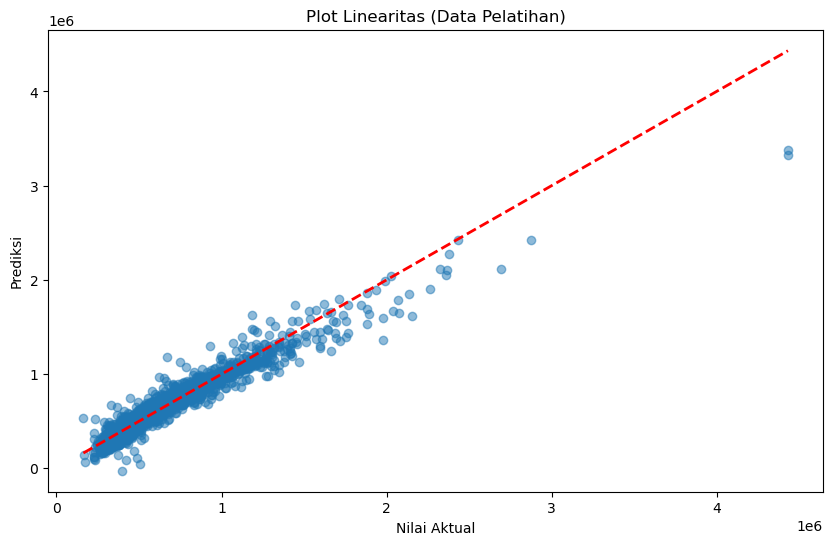

In [41]:
import matplotlib.pyplot as plt

# Membuat prediksi pada data pelatihan
y_train_pred = model.predict(X_train)

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Nilai Aktual")
plt.ylabel("Prediksi")
plt.title("Plot Linearitas (Data Pelatihan)")
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', lw=2)
plt.show()